

# Import helpful libraries


In [1]:
# Import useful libraries
# For imputation and data splitting
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, 

# Plotting lib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data


In [2]:
# Loading the data
data = pd.read_csv("Datasets/Life Expectancy Data.csv")

# Preview the data
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Subset for developing countries
le_dev_country_data = data.loc[data['Status'] == 'Developing']
# First five
le_dev_country_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Selecting interesting variables
cols = ['Life expectancy ', 'Adult Mortality',' BMI ', ' HIV/AIDS', 
       'Income composition of resources', 'Schooling']
# New dataframe with selected variables
le_dev_country_data = le_dev_country_data[cols]

In [5]:
# Shape of the new dataset
le_dev_country_data.shape

(2426, 6)

In [6]:
# renaming columns
le_dev_country_data = le_dev_country_data.rename(columns={'Life expectancy ':'life_expectancy', 
                                                          'Adult Mortality':'adult_mortality',
                                                          ' BMI ':'bmi', 
                                                          ' HIV/AIDS':'hiv_aids', 
                                                          'Income composition of resources':'income_comp_res', 
                                                          'Schooling':'schooling'})
le_dev_country_data.head()

,life_expectancy,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
0,65.0,263.0,19.1,0.1,0.479,10.1
1,59.9,271.0,18.6,0.1,0.476,10.0
2,59.9,268.0,18.1,0.1,0.470,9.9
3,59.5,272.0,17.6,0.1,0.463,9.8
4,59.2,275.0,17.2,0.1,0.454,9.5


# Step 1: EDA


In [7]:
# print a summary description
le_dev_country_data.describe()

,life_expectancy,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
count,2416.000000,2416.000000,2392.000000,2426.000000,2307.000000,2311.000000
mean,67.111465,182.833195,35.435326,2.088664,0.582310,11.219256
std,9.006092,127.974557,19.425091,5.526145,0.201597,3.056601
min,36.300000,1.000000,1.000000,0.100000,0.000000,0.000000
25%,61.100000,92.000000,18.300000,0.100000,0.466500,9.600000
50%,69.000000,163.000000,35.200000,0.100000,0.631000,11.700000
75%,74.000000,253.000000,53.200000,1.400000,0.727000,13.200000
max,89.000000,723.000000,87.300000,50.600000,0.919000,18.300000


# Step 2: Data preparation (cleaning)

In [8]:
# Get names of columns with missing values
cols_with_missing = [col for col in le_dev_country_data.columns
                     if le_dev_country_data[col].isnull().any()]
print(cols_with_missing)

['life_expectancy', 'adult_mortality', 'bmi', 'income_comp_res', 'schooling']


In [9]:
# Imputation using median strategy

my_imputer = SimpleImputer(strategy='median')
imputed_dataset = pd.DataFrame(my_imputer.fit_transform(le_dev_country_data))

# Imputation removed column names; put them back
imputed_dataset.columns = le_dev_country_data.columns
imputed_dataset.describe()

,life_expectancy,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000
mean,67.119250,182.751443,35.432028,2.088664,0.584698,11.242045
std,8.988318,127.716744,19.288454,5.526145,0.196869,2.984994
min,36.300000,1.000000,1.000000,0.100000,0.000000,0.000000
25%,61.100000,92.250000,18.400000,0.100000,0.475000,9.700000
50%,69.000000,163.000000,35.200000,0.100000,0.631000,11.700000
75%,74.000000,252.750000,53.075000,1.400000,0.722000,13.100000
max,89.000000,723.000000,87.300000,50.600000,0.919000,18.300000


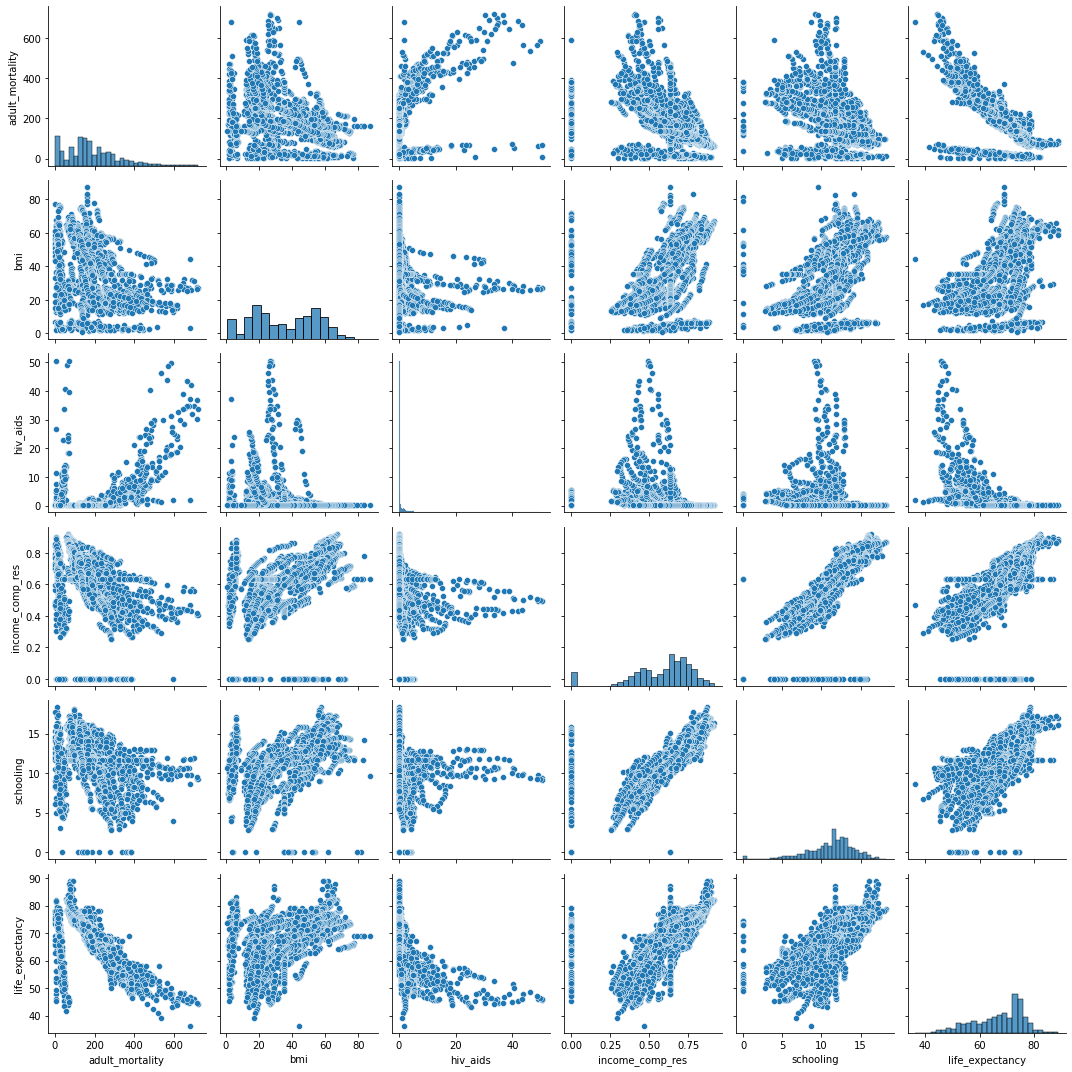

In [10]:
# Visualization of data distributions
# scatterplot matrix to visualize pair-wise correlations between features

cols = ['adult_mortality',
       'bmi','hiv_aids', 'income_comp_res', 'schooling', 'life_expectancy']
sns.pairplot(imputed_dataset[cols], height=2.5)
plt.tight_layout()
plt.show()

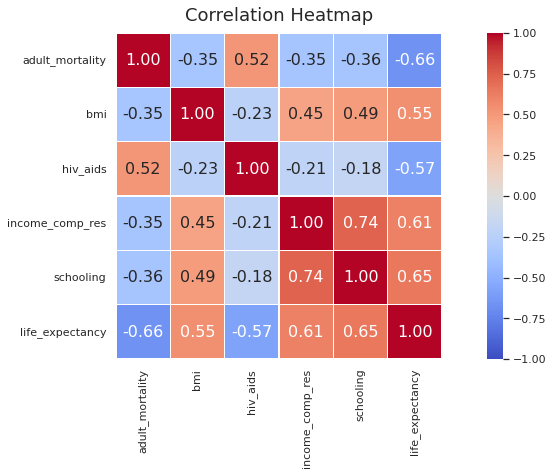

In [11]:
# Visualizing correlation matrix

sns.set_theme()
plt.figure(figsize=(16, 6))
cm = np.corrcoef(imputed_dataset[cols].values.T)
heatmap = sns.heatmap(cm, vmin=-1, vmax=1, cbar=True, annot=True,square=True,
                      linewidths = .5,
                fmt='.2f', annot_kws={'size': 16},yticklabels=cols,
                xticklabels=cols,cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.show()

In [12]:
# Train test split
training_data = imputed_dataset.sample(frac=0.8, random_state=25)
testing_data = imputed_dataset.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1941
No. of testing examples: 485


In [13]:
# Remove target variable from test data
testing_data.drop(['life_expectancy'], axis=1, inplace=True)


In [14]:
# Preview test data
testing_data.head()

,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
2,268.0,18.1,0.1,0.470,9.9
10,291.0,14.2,0.1,0.396,7.9
14,316.0,12.6,0.1,0.340,5.9
20,88.0,55.1,0.1,0.738,13.3
22,91.0,53.5,0.1,0.721,12.2


In [15]:
# Saving training set in csv
training_data.to_csv('Datasets/train.csv', index=False)

# Saving test set in csv
testing_data.to_csv('Datasets/test.csv', index=False)